# Scrape Data & Data Cleaning

In [15]:
import numpy as np
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
import requests
import statsmodels.api as sm
from IPython.core.display import display, HTML
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

In [7]:
#importing sofifa data & dictionary creation
#Only attackers and midfielders
player_stats = defaultdict(list)
i = 0
while(i < 1000):
    if i == 0:
        url = 'https://sofifa.com/players?type=all&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=pf&showCol%5B3%5D=oa&showCol%5B4%5D=he&showCol%5B5%5D=sh&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=wg&showCol%5B9%5D=fi&showCol%5B10%5D=dr&showCol%5B11%5D=fr&showCol%5B12%5D=so&showCol%5B13%5D=sr&showCol%5B14%5D=ln&showCol%5B15%5D=aw&col=fi&sort=desc&r=200061&set=true'
    else:
        url = 'https://sofifa.com/players?type=all&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=pf&showCol%5B3%5D=oa&showCol%5B4%5D=he&showCol%5B5%5D=sh&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=wg&showCol%5B9%5D=fi&showCol%5B10%5D=dr&showCol%5B11%5D=fr&showCol%5B12%5D=so&showCol%5B13%5D=sr&showCol%5B14%5D=ln&showCol%5B15%5D=aw&col=fi&sort=desc&r=200061&set=true&offset={}'.format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')

    print(url)

    sleep(2)


    #Names
    names = soup.find(class_='table').find_all('a', class_="tooltip")
    players = [name.text for name in names]

    #Players heights in inches Conversion
    l_heights = [height.text.split("'") for height in (soup.find(class_='table').find_all('td', class_='col-hi'))]

    def heights_inches(list_heights):
        players_heights = []
        for height in list_heights:
            players_heights.append((int(height[0])*12)+ (int(height[1][0:-1])))

        return players_heights

    heights_in = heights_inches(l_heights)

    #Preferred feet
    preferred_ft = [ft.text for ft in (soup.find(class_='table').find_all('td', class_='col-pf'))]

    #Wages in Euro, in 000
    wages = [wage.text.strip('K').strip('€') for wage in (soup.find(class_='table').find_all('td', class_='col-wg'))]

    #Finish
    finish = [finish.text for finish in (soup.find(class_='table').find_all('td', class_='col-fi'))]

    #Heading accuracy
    header_acc = [head.text for head in (soup.find(class_='table').find_all('td', class_='col-he'))]

    #Short Pass
    short_pass = [short_p.text for short_p in (soup.find(class_='table').find_all('td', class_='col-sh'))]

    #Dribbles
    dribbles = [dribble.text for dribble in (soup.find(class_='table').find_all('td', class_='col-dr'))]

    #Free Kick Accuracy
    free_kick = [fk.text for fk in (soup.find(class_='table').find_all('td', class_='col-fr'))]

    #Acceleration
    acceleration = [accel.text for accel in (soup.find(class_='table').find_all('td', class_='col-ac'))]

    #sprint_speed
    sprint_speed = [sprint.text for sprint in (soup.find(class_='table').find_all('td', class_='col-sp'))]

    #shot_power
    shot_power = [so.text for so in (soup.find(class_='table').find_all('td', class_='col-so'))]

    #strength
    strength = [sr.text for sr in (soup.find(class_='table').find_all('td', class_='col-sr'))]

    #long shot
    long_shot = [ln.text for ln in (soup.find(class_='table').find_all('td', class_='col-ln'))]

    #work rate
    work_rate = [aw.text for aw in (soup.find(class_='table').find_all('td', class_='col-aw'))]



    player_stats['name'] += players
    player_stats['height'] += heights_in
    player_stats['pf'] += preferred_ft
    player_stats['wage'] += wages
    player_stats['finish'] += finish
    player_stats['heading'] += header_acc
    player_stats['s_passing'] += short_pass
    player_stats['dribble'] += dribbles
    player_stats['fk_accuracy'] += free_kick
    player_stats['acceleration'] += acceleration
    player_stats['sprint_speed'] += sprint_speed
    player_stats['shot_power'] += shot_power
    player_stats['strength'] += strength
    player_stats['long_shot'] += long_shot
    player_stats['work_rate'] += work_rate

    i += 60

https://sofifa.com/players?type=all&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=pf&showCol%5B3%5D=oa&showCol%5B4%5D=he&showCol%5B5%5D=sh&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=wg&showCol%5B9%5D=fi&showCol%5B10%5D=dr&showCol%5B11%5D=fr&showCol%5B12%5D=so&showCol%5B13%5D=sr&showCol%5B14%5D=ln&showCol%5B15%5D=aw&col=fi&sort=desc&r=200061&set=true
https://sofifa.com/players?type=all&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=pf&showCol%5B3%5D=oa&showCol%5B4%5D=he&showCol%5B5%5D=sh&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=wg&showCol%5B9%5D=fi&showCol%5B10%5D=dr&showCol%5B11%5D=fr&showCol%5B12%5D=so&showCol%5B13%5D=sr&showCol%5B14%5D=ln&showCol%5B15%5D=aw&col=fi&sort=desc&r=200061&set=true&offset=60
https://sofifa.com/players?type=all&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=pf&showCol%5B3%5D=oa&showCol%5B4%5D=he&showCol%5B5%5D=sh&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=wg&showCol%5B9%5D=fi&showCol%5B10%5D=dr&showCol%5B11%5D=fr&showCo

In [9]:
#dropping duplicates
df1 = pd.DataFrame(player_stats)
df1.drop_duplicates(subset=['name'], inplace=True)
df1.set_index(['name'], inplace=True)
df1.iloc[0][0]

67

In [10]:
#information copied from infogol to excel
#EPL, Serie A, La Liga, Bundesliga, Ligue 1, Primeira liga, Eredivisie, Brazilian Serie a
df2 = pd.read_excel('player_goals.xlsx', index_col=0)


#from:
#  'https://www.infogol.net/en/leagues/english-premier-league-top-goalscorers-2019-20/138', 
#  'https://www.infogol.net/en/leagues/italian-serie-a-top-goalscorers-2019-20/163',
#  'https://www.infogol.net/en/leagues/spanish-la-liga-top-goalscorers-2019-20/159',
#  'https://www.infogol.net/en/leagues/german-bundesliga-top-goalscorers-2019-20/155',
#  'https://www.infogol.net/en/leagues/french-ligue-1-top-goalscorers-2019-20/139',
#  'https://www.infogol.net/en/leagues/portuguese-primeira-liga-top-goalscorers-2019-20/247',
#  'https://www.infogol.net/en/leagues/dutch-eredivisie-top-goalscorers-2019-20/246',
#  'https://www.infogol.net/en/leagues/brazilian-serie-a-top-goalscorers-2019/117']



In [11]:
#merging tables then dropping players without goals

result = pd.concat([df1, df2], axis=1)
result.dropna(subset=['Goals'], inplace=True)


In [12]:
#changing data types from objects -> numeric
cols = ['wage','finish','heading','s_passing','dribble','fk_accuracy', 'acceleration',
        'sprint_speed', 'shot_power', 'strength', 'long_shot']
result[cols] = result[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Data Analysis

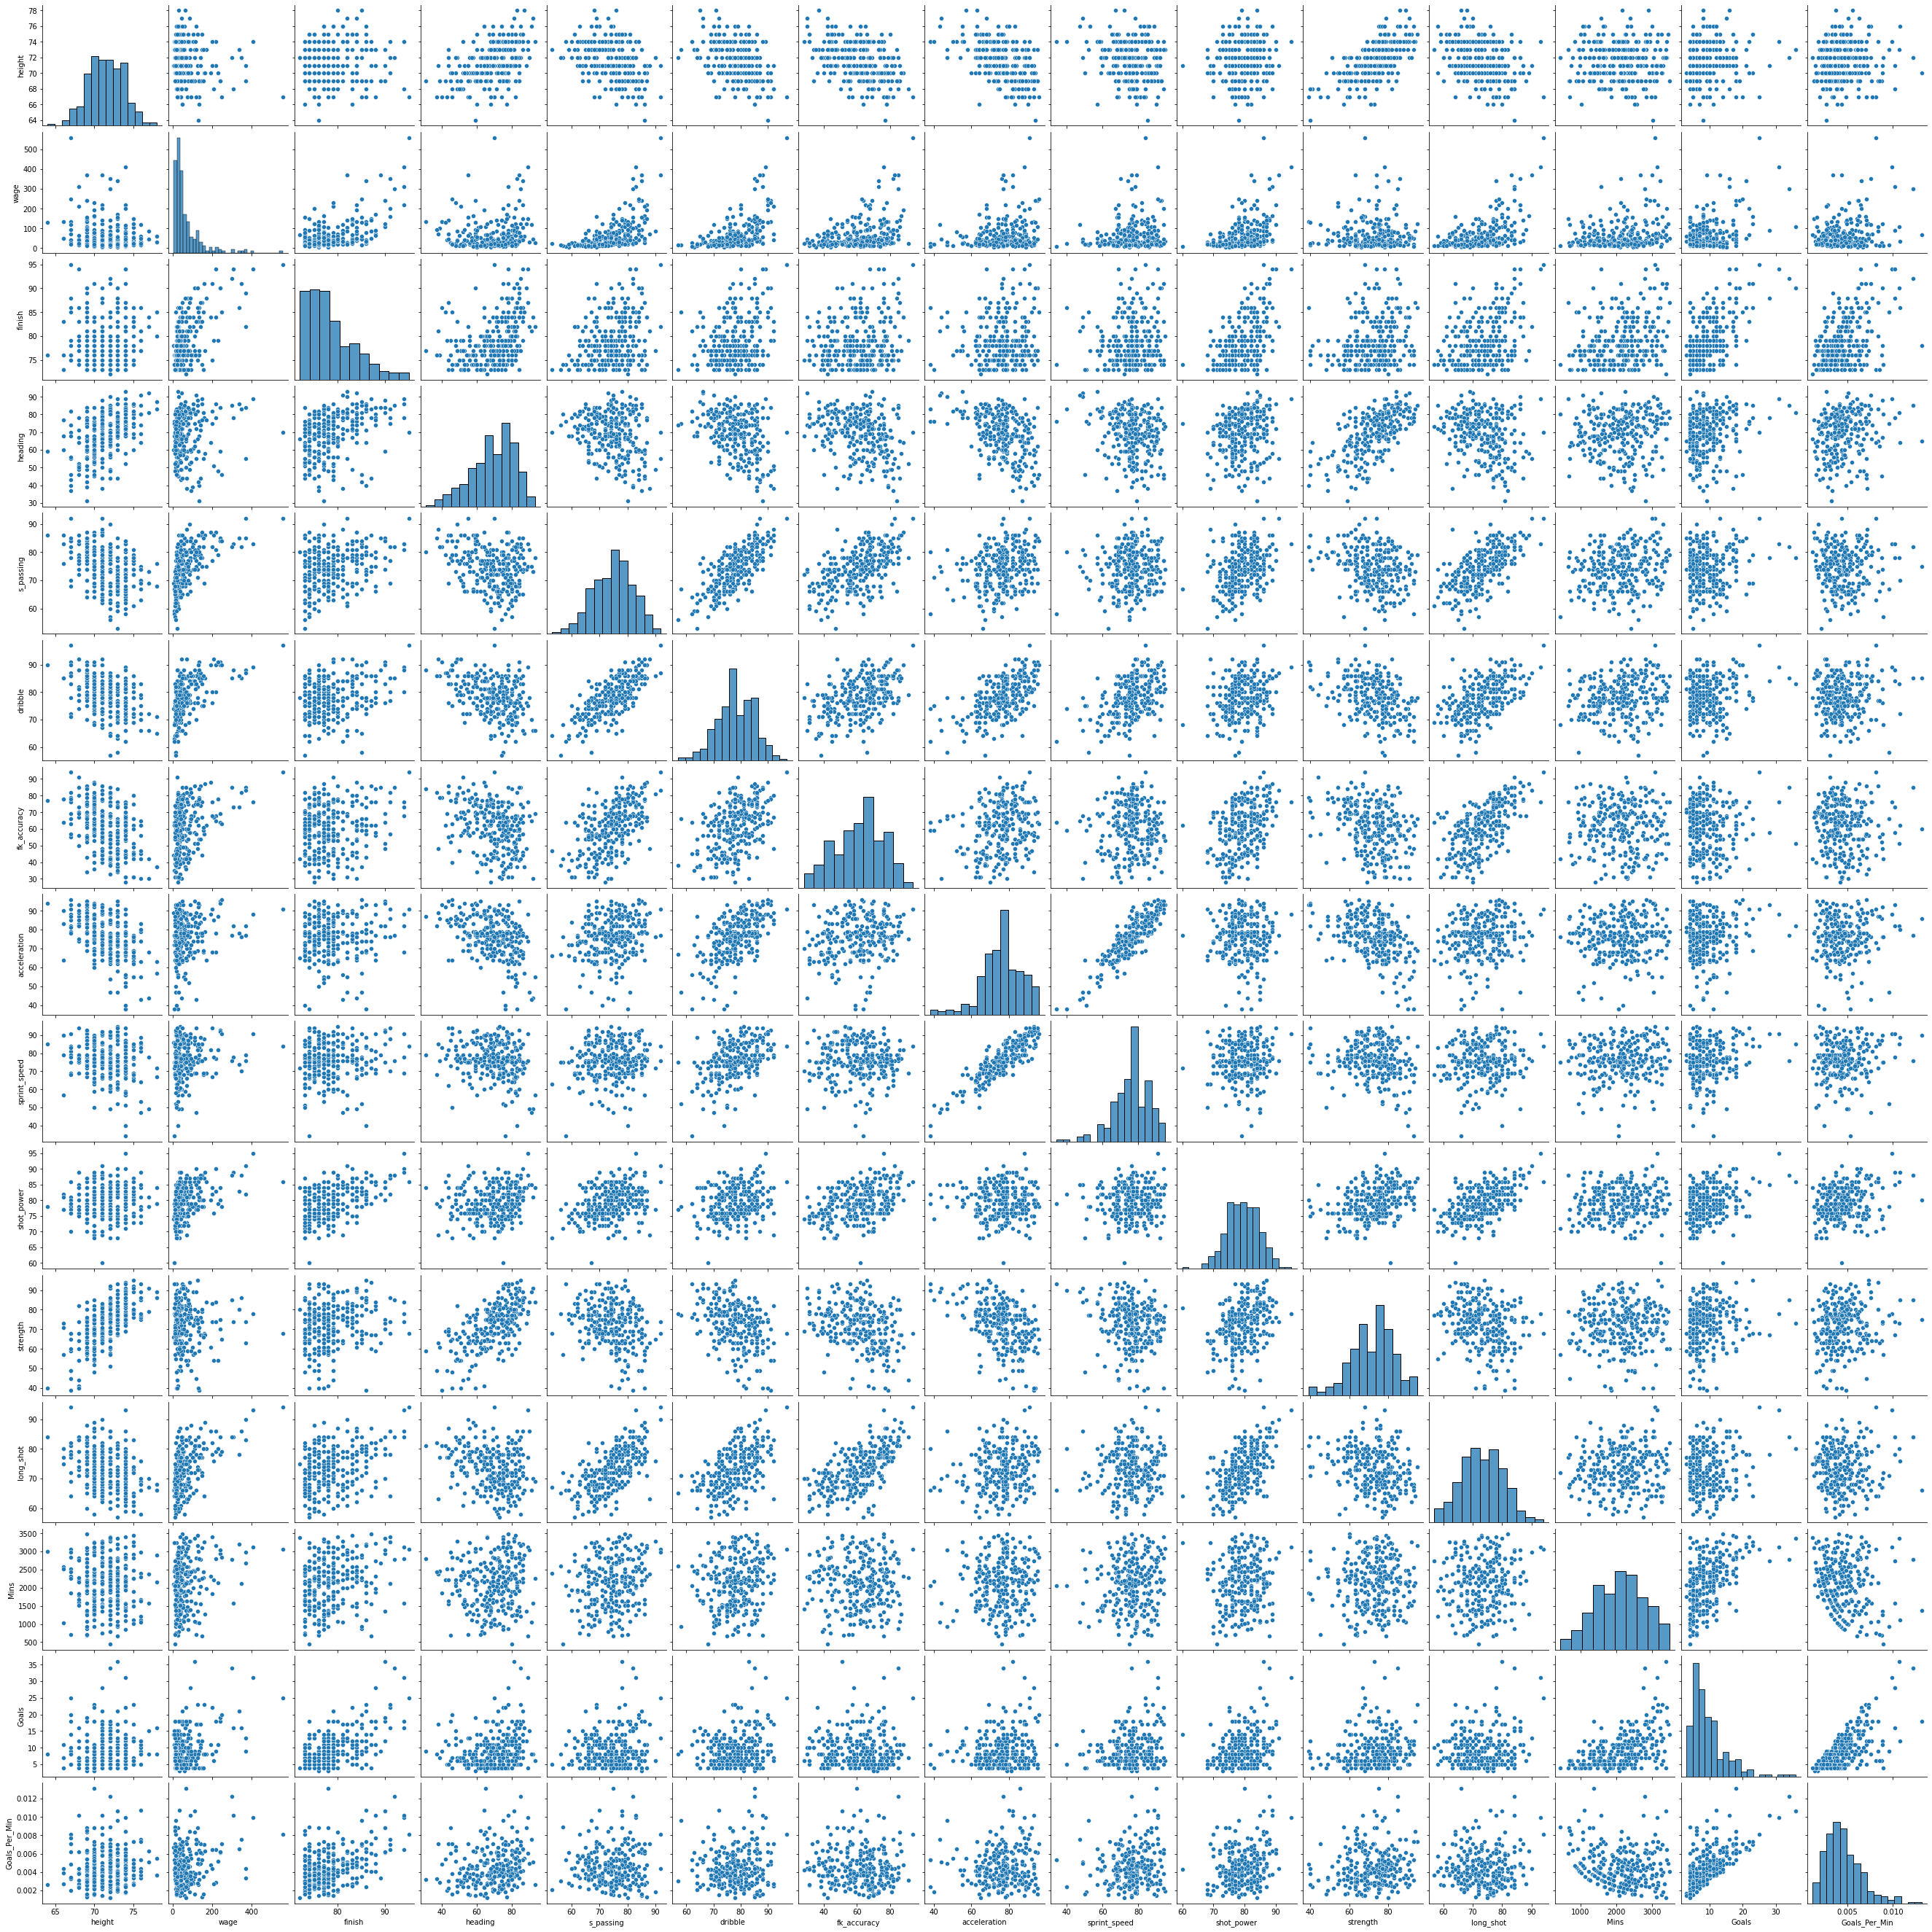

In [632]:
sns.pairplot(result,


In [17]:
# sprint sprint_speed & acceleration shows correlation
# X = result[['finish','heading','s_passing','dribble','fk_accuracy',
#         'sprint_speed', 'shot_power', 'strength', 'long_shot']]
X = result[['finish','heading','dribble','sprint_speed','shot_power']]
X = sm.add_constant(X)
y = result["Goals_Per_Min"]

In [18]:
#R2: 0.225 and adjR2: 0.240. finish is only feature where we can reject the null hypothesis.
baseline_model = sm.OLS (y,X)
baseline_fit = baseline_model.fit()
baseline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Goals_Per_Min   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     16.37
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.91e-14
Time:                        11:59:09   Log-Likelihood:                 1305.9
No. Observations:                 265   AIC:                            -2600.
Df Residuals:                     259   BIC:                            -2578.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0104      0.002     -4.760      0.000      -0.015      -0.006
finish           0.0002   3.03e-05      6.932      0.000       0.000       0.000
heading      -5.469e-06   1.18e-05     -0.464      0.643   -2.87e-05    1.77e-05
dribble      -3.867e-05   2.17e-05     -1.785      0.075   -8.13e-05    3.98e-06
sprint_speed  2.331e-05   1.23e-05      1.897      0.059   -8.83e-07    4.75e-05
shot_power    5.285e-07   2.51e-05      0.021      0.983   -4.89e-05    4.99e-05
==============================================================================
Omnibus:                       54.216   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.042
Skew:                           1.080   Prob(JB):                     3.11e-22
Kurtosis:                       5.074   Cond. No.                     3.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
split_and_validate(X,y)


Validation R^2 score was: 0.30153656683122454
Feature coefficient results: 

const : 0.00
finish : 0.00
heading : -0.00
dribble : -0.00
sprint_speed : 0.00
shot_power : -0.00


Text(0.5, 1.0, 'Actuals vs Regression Line')

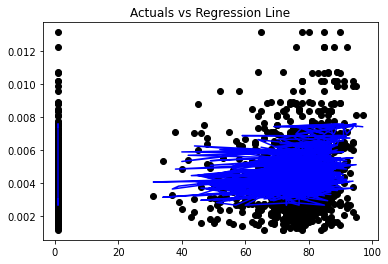

In [19]:
#Not used. Graph too messy

#Generated Predictions
y_predicted = baseline_fit.predict(X)

#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black');
plt.plot(X,y_predicted,color='blue')

plt.title("Actuals vs Regression Line")

In [675]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [676]:
split_and_validate(X, y)


Validation R^2 score was: 0.40169809426186365
Feature coefficient results: 

finish : 0.69
heading : -0.03
s_passing : -0.04
dribble : 0.05
fk_accuracy : 0.01
acceleration : -0.01
sprint_speed : 0.02
shot_power : 0.01
strength : 0.03
long_shot : -0.08


In [ ]:
# def final_linear_regression_model_with_scaling(x_train, x_test, y_train, y_test):
#     '''
#     Takes in a dataframe and calls other functions to split the data into train and test sets.
#     Models data using a linear regression model with standard scaling to predict university
#     graduation rates. Prints train and test r2 and mse. Pickles the model for future use.
#     '''
#     scaler = StandardScaler()
#     x_train_scaled = scaler.fit_transform(x_train.values)
#     x_test_scaled = scaler.transform(x_test.values)

#     linear_regression = LinearRegression()
#     linear_regression.fit(x_train_scaled, y_train)
#     y_pred = linear_regression.predict(x_test_scaled)

#     r2_train = linear_regression.score(x_train_scaled, y_train)
#     r2_test = linear_regression.score(x_test_scaled, y_test)
#     mse = mean_squared_error(y_test, y_pred)

#     # Print model results
#     print('Linear Regression Results with Scaling:\n'
#           f'R^2 Train: {r2_train},\n'
#           f'R^2 Test: {r2_test},\n'
#           f'MSE: {mse}')


<AxesSubplot:>

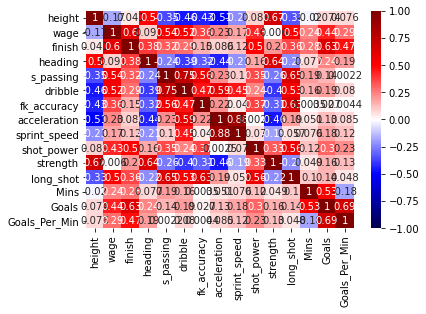

In [634]:
sns.heatmap(result.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# Residuals

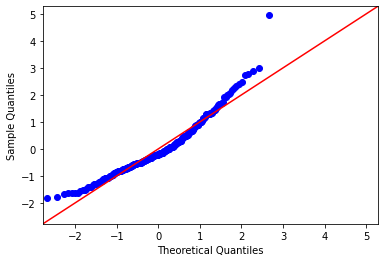

In [20]:
#Overall right skewed, with one very obvious outlier
import scipy
plt = sm.qqplot(baseline_fit.resid, dist=scipy.stats.norm, fit = True, line='45')

<AxesSubplot:>

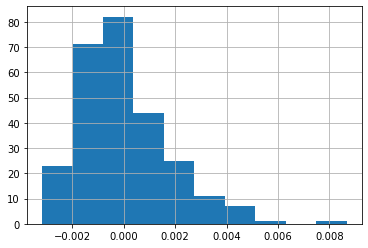

In [21]:
baseline_fit.resid.hist()

In [22]:
# Looking for the outlier
# baseline_fit.resid.idxmax()
baseline_fit.resid.max()
# X.loc[[' L. Muriel']]
# X.head()

0.008663025031774914

In [23]:
y_pred = baseline_fit.predict(X.loc[[' L. Muriel']])
print('Actual goal per min:', y.loc[' L. Muriel'])
print('Predicted goal per min:', y_pred[0])
print('Residual:', y.loc[' L. Muriel']-y_pred[0])

Actual goal per min: 0.013138686131386862
Predicted goal per min: 0.004475661099611948
Residual: 0.008663025031774914


In [25]:
# outlier
result.loc[' L. Muriel']


height                    70
pf                     Right
wage                      69
finish                    78
heading                   65
s_passing                 75
dribble                   85
fk_accuracy               60
acceleration              86
sprint_speed              90
shot_power                80
strength                  75
long_shot                 66
work_rate               High
Mins             1370.000000
Goals              18.000000
Goals_Per_Min       0.013139
Name:  L. Muriel, dtype: object

In [24]:
# for comparison
result.loc[' L. Messi']

height                    67
pf                      Left
wage                     560
finish                    95
heading                   70
s_passing                 92
dribble                   97
fk_accuracy               94
acceleration              91
sprint_speed              84
shot_power                86
strength                  68
long_shot                 94
work_rate             Medium
Mins             3067.000000
Goals              25.000000
Goals_Per_Min       0.008151
Name:  L. Messi, dtype: object